In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
x_train = pd.read_csv('Logistic_X_Train.csv').values
y_train = pd.read_csv('Logistic_Y_Train.csv').values

x = x_train.T
x1 = x[0]
x2 = x[1]
x3 = x[2]






(3000, 1)

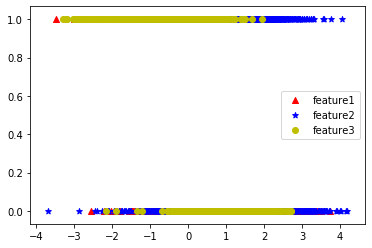

In [30]:
plt.scatter(x1,y_train,marker='^',color='r',label='feature1')
plt.scatter(x2,y_train,marker='*',color='b',label='feature2')
plt.scatter(x3,y_train,color='y',label='feature3')
plt.legend()

In [51]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [52]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [55]:
def error(y_train,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y_train[i]*np.log2(hx)+(1-y_train[i])*np.log2(1-hx)
    return err/m

In [56]:
def get_grad(x,w,b,y_train):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y_train[i] - hx)*x[i]
        grad_b += (y_train[i]-hx)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [69]:
def gradient_descent(x,y,w,b,learning_rate=0.001):
    err = error(y_train,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y_train)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [70]:
loss = []


W = 2*np.random.random((x_train.shape[1],))
b = 5*np.random.random()

In [74]:
for i in range(1000):
    l,W,b = gradient_descent(x_train,y_train,W,b,learning_rate=0.001)
    
    loss.append(l)

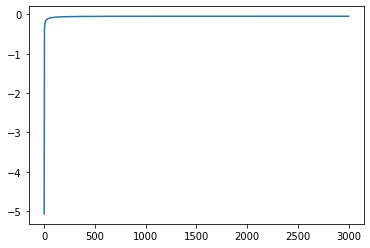

In [76]:
plt.plot(loss)